**8.** Assume that the data set is separable in the $Z$ space. That is, hard-margin SVM has an optimal solution of some vector $\alpha_{*}$. 

Prove that if $ C \geq \max \limits_{1 \leq n \leq N} \alpha_{n}^{*} $, the vector $ \alpha_{n}^{*}$ is also an optimal solution to the soft-margin SVM.

**Solution:**
if $ C \geq \max \limits_{1 \leq n \leq N} \alpha_{n}^{*} $, the vector $ \alpha_{n}^{*}$ also satisfies the constraint condition of Soft-Margin Problem, so is an optimal solution.

## Operation of Kernels
**9.** Let $K_{1}(x; x_{0}) = \phi_{1}(x)^{T} \phi_{1}(x')$ be a valid kernel. Which of the followings are always valid kernels,
assuming that $0 < K_{1}(x; x_{0}) < 2$ ?

   [a]  $ K(x; x_{0}) = (2 − K_{1}(x; x_{0}))^{1} $

   [b]  $ K(x; x_{0}) = (2 − K_{1}(x; x_{0}))^{0} $

   [c]  $ K(x; x_{0}) = (2 − K_{1}(x; x_{0}))^{-1} $

   [d]  $ K(x; x_{0}) = (2 − K_{1}(x; x_{0}))^{-2} $

(+ proof of your choices)

**Solution:**
可以参考PRML中 Kernel 的性质

[a] is not a valid kernel. Consider $K_{1}(x_{1}, x_{1}) = K_{1}(x_{2}, x_{2}) = 1, K_{1}(x_{1}, x_{2}) = 0$

[b] is right.

[c] is a valid kernel. Consider $ \frac{1}{1-K} = 1 + K + K^{2} + ...$ is a valid kernel, if $K$ is a valid kernel. 

[d] is a valid kernel, because $K_{d} = K_{c}^{2}$ and $K_{c}$ is a valid kernel.

**10.** For a given valid kernel $K$, consider a new kernel $\tilde{K}(x; x_{0}) = pK(x; x_{0})$ for some $p > 0$. 

Prove or disprove that for the dual of soft-margin support vector machine, using $\tilde{K}$ along with a new $\tilde{C} = \frac{C}{p} $
instead of $K$ with the original $C$ leads to an equivalent $g_{svm}$ classifier

**Solution:**
$$
\begin{align*}
\min \ \tilde{L}(\alpha) &= \frac{1}{2} \sum \limits_{i, j} \alpha_{i} \alpha_{j} y_{i} y_{j} \tilde{K}(x_{i}, x_{j}) - \sum \limits_{i} \alpha_{i} \\
&= \frac{1}{2} \sum \limits_{i, j} \alpha_{i} \alpha_{j} y_{i} y_{j} p K(x_{i}, x_{j}) - \sum \limits_{i} \alpha_{i} \\
&= \frac{1}{p} (\frac{1}{2} \sum \limits_{i, j} \alpha_{i} p \alpha_{j} p y_{i} y_{j} K(x_{i}, x_{j}) - \sum \limits_{i} \alpha_{i} p) \\
s.t. &\sum \alpha_{i} p y_{i} = 0 \\
&0 \leq \alpha_{i}p \leq C
\end{align*}
$$

this will lead to an equivalent $g_{svm}$ classifier

## Experiments with Soft-Margin Support Vector Machine
For Questions 11 to 16, we are going to experiment with a real-world data set. Download the processed
US Postal Service Zip Code data set with extracted features of intensity and symmetry for training and
testing:

    http://www.amlbook.com/data/zip/features.train
    http://www.amlbook.com/data/zip/features.test

The format of each row is

    digit intensity symmetry

We will consider binary classification problems of the form "one of the digits" (as the positive class) versus "other digits" (as the negative class).
The training set contains thousands of examples, and some quadratic programming packages cannot handle this size. We recommend that you consider the LIBSVM package

    http://www.csie.ntu.edu.tw/~cjlin/libsvm/

Regardless of the package that you choose to use, please read the manual of the package carefully to make sure that you are indeed solving the soft-margin support vector machine taught in class like the dual formulation below:

$$
\begin{align}
\min \ &\frac{1}{2} \sum \limits_{n=1}^{N} \sum \limits_{m=1}^{N} \alpha_{n} \alpha_{m} y_{n} y_{m} K(x_{n}, x_{m}) - \sum \limits_{n=1}^{N} \alpha_{n} \\
s.t. \ &\sum \limits_{n=1}^{N} y_{n} \alpha_{n} = 0 \\
\ \ &0 \leq \alpha_{n} \leq C \ \ n=1, ..., N \\
\end{align}
$$

In the following questions, please use the 0/1 error for evaluating $E_{in}$, $E_{val}$ and $E_{out}$ (through the test set). Some practical remarks include:

(i) Please tell your chosen package to not automatically scale the data for you, lest you should change the effective kernel and get different results.

(ii) It is your responsibility to check whether your chosen package solves the designated formulation with enough numerical precision. Please read the manual of your chosen package for software parameters whose values affect the outcome —— any ML practitioner needs to deal with this kind of added uncertainty.

**11.** Consider the linear soft-margin SVM. That is, either solve the primal formulation of soft-margin SVM with the given $x_{n}$, or take the linear kernel $K(x_{n}; x_{m}) = x_{n}^{T} x_{m}$ in the dual formulation. 

For the binary classification problem of "0" versus "not 0", plot $ \left \| w \right \|$ versus $ log_{10} C \in \{−5; −3; −1; 1; 3\} $. 

Describe your findings.

1e-05 [[0.00138602 0.00677784]] 0.006918099852802213
0.001 [[0.13899329 0.46144309]] 0.48192204572043185
0.1 [[7.19382277 0.50519902]] 7.2115401998587805
10 [[17.89916067  0.72719118]] 17.91392641419448
1000 [[18.85640007  0.75988369]] 18.871704930686633


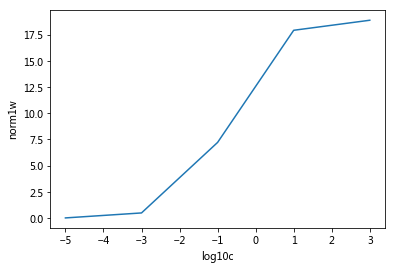

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline

training_file = "./data/features.train.txt"
testing_file = "./data/features.test.txt"
df = pd.read_table(training_file, sep="\s+", header=None, names=["digit", "intensity", "symmetry"], dtype={"digit": np.int32})
df2 = pd.read_table(testing_file, sep="\s+", header=None, names=["digit", "intensity", "symmetry"], dtype={"digit": np.int32})


log10cs = [-5, -3, -1, 1, 3]
# log10cs = list(range(-5, 4, 1))
norm1ws = []
train_df = pd.concat([df[df["digit"]!=0].sample((df["digit"]==0).sum()), df[df["digit"]==0]])
for log10c in log10cs:
    c = pow(10, log10c)
    clf = SVC(C=c, kernel="linear")
    clf.fit(train_df[["intensity", "symmetry"]], train_df["digit"]==0)
    norm1ws.append(np.sqrt(np.sum(np.square(clf.coef_))))
    print(c, clf.coef_, norm1ws[-1])

plt.plot(log10cs, norm1ws)
plt.xlabel("log10c")
plt.ylabel("norm1w")

**12.** Consider the polynomial kernel $K(x_{n}; x_{m}) = (1 + x_{n}^{T} x_{m})^{Q}$, where $Q$ is the degree of the polynomial. 

With $Q = 2$, and the binary classification problem of "8" versus "not 8", plot $E_{in}$ versus $log_{10} C \in \{−5; −3; −1; 1; 3\}$.

Describe your findings.

**13.** Following Question 12, plot number of support vectors versus $log_{10} C \in \{−5; −3; −1; 1; 3\}$ instead. 

Describe your findings.

1e-05 1084 0.5156826568265682
0.001 1058 0.5415129151291513
0.1 936 0.6217712177121771
10 910 0.6595940959409594
1000 814 0.6798892988929889


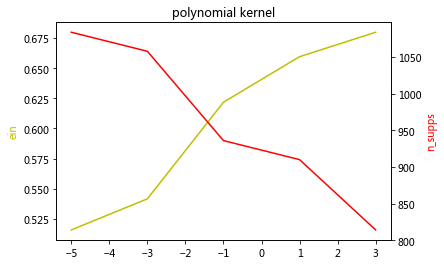

In [2]:
log10cs = [-5, -3, -1, 1, 3]
# log10cs = list(range(-5, 4, 1))
eins = []
n_supps = []

train_df = pd.concat([df[df["digit"]!=8].sample((df["digit"]==8).sum()), df[df["digit"]==8]])

for log10c in log10cs:
    c = pow(10, log10c)
    clf = SVC(C=c, kernel="poly", degree=2, coef0=1, gamma=1)
    clf.fit(train_df[["intensity", "symmetry"]], train_df["digit"]==8)
    eins.append(clf.score(train_df[["intensity", "symmetry"]], train_df["digit"]==8))
    n_supps.append(np.sum(clf.n_support_))
    print(c, n_supps[-1], eins[-1])

fig = plt.figure()

ax1 = fig.add_subplot(111)
ax1.plot(log10cs, eins, "y")
ax1.set_ylabel("ein")
ax1.set_title("polynomial kernel")
ax1.yaxis.label.set_color("y")

ax2 = ax1.twinx()  # this is the important function
ax2.plot(log10cs, n_supps, 'r')
ax2.set_ylabel("n_supps")
ax2.set_xlabel('log10c')
ax2.yaxis.label.set_color("r")

**14.**  Consider the Gaussian kernel $K(x_{n}; x_{m}) = exp(-\gamma \left \| x_{n} - x_{m} \right \|^{2})$. 

With $\gamma = 80$, and the binary classification problem of "0" versus "not 0".Consider values of $log_{10} C \in \{−3; −2; −1; 0; 1\}$.

Plot the the distance of any free support vector to the hyperplane in the (infinite-dimensional) $Z$ space versus $log_{10}C$. 

Describe your findings.

0.001 [17.68183266]
0.01 [0.17681833]
0.1 [0.01596109]
1 [0.0071161]
10 [0.00199135]


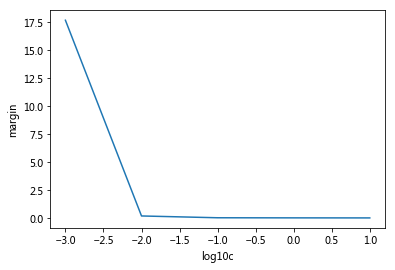

In [3]:
from sklearn.metrics.pairwise import rbf_kernel

log10cs = [-3, -2, -1, 0, 1]
margins = []

# 特征空间的margin计算方式???
def rbf_margin(clf):
    # print(clf.dual_coef_)
    return clf.dual_coef_.dot(rbf_kernel(clf.support_vectors_, clf.support_vectors_, gamma=clf.gamma)).dot(clf.dual_coef_.T)  

train_df = pd.concat([df[df["digit"]!=0].sample((df["digit"]==0).sum()), df[df["digit"]==0]])
for log10c in log10cs:
    c = pow(10, log10c)
    clf = SVC(C=c, kernel="rbf", gamma=80)
    clf.fit(train_df[["intensity", "symmetry"]], train_df["digit"]==0)
    margins.append(1/rbf_margin(clf)[0])
    print(c, margins[-1])

plt.plot(log10cs, margins)
plt.xlabel("log10c")
plt.ylabel("margin")

**15.** Following Question 14, when fixing $C = 0.1$, plot $E_{out}$ versus $log_{10}\gamma \in \{0; 1; 2; 3; 4\} $. 

Describe your findings.

1 0.8943903442600466
10 0.9022082018927445
100 0.9039912220545878
1000 0.8362364559045399
10000 0.8362364559045399


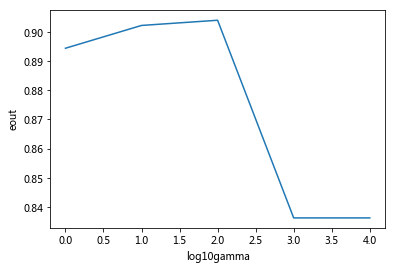

In [4]:
log10gammas = [0,1,2,3,4]
eouts = []

# train_df = pd.concat([df[df["digit"]!=0].sample((df["digit"]==0).sum()), df[df["digit"]==0]])
# test_df = pd.concat([df2[df2["digit"]!=0].sample((df2["digit"]==0).sum()), df2[df2["digit"]==0]])

train_df = df
test_df = df

for log10gamma in log10gammas:
    gamma = pow(10, log10gamma)
    clf = SVC(C=0.1, kernel="rbf", gamma=gamma)
    clf.fit(train_df[["intensity", "symmetry"]], train_df["digit"]==0)
    eouts.append(clf.score(test_df[["intensity", "symmetry"]], test_df["digit"]==0))
    print(gamma, eouts[-1])

plt.plot(log10gammas, eouts)
plt.xlabel("log10gamma")
plt.ylabel("eout")

**16.** Following Question 14 and consider a validation procedure that randomly samples 1000 examples from the training set for validation and leaves the other examples for training $g_{svm}^{−}$ . 

Fix $C = 0.1$ and use the validation procedure to choose the best $log_{10}\gamma \in \{−1; 0; 1; 2; 3\}$ according to Eval. 

If there is a tie of $E_{val}$, choose the smallest $\gamma$. Repeat the procedure 100 times. Plot a histogram for the number of times each $log_{10}\gamma$ is selected.

<Container object of 5 artists>

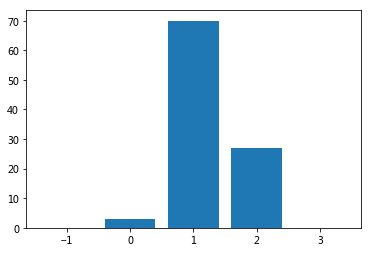

In [5]:
log10gammas = [-1,0,1,2,3]
best_log10gammas = []

from sklearn.model_selection import train_test_split

for i in range(100):
    train_df, val_df = train_test_split(df, test_size=1000)
    best_score = []
    for log10gamma in log10gammas:
        gamma = pow(10, log10gamma)
        clf = SVC(C=0.1, kernel="rbf", gamma=gamma)
        clf.fit(train_df[["intensity", "symmetry"]], train_df["digit"]==0)
        val_score = clf.score(val_df[["intensity", "symmetry"]], val_df["digit"]==0)
        best_score.append(val_score)
#         print(gamma, val_score, end="\t\t")
#     print()
    best_log10gammas.append(log10gammas[best_score.index(max(best_score))])

cnt_dict = pd.value_counts(best_log10gammas).to_dict()
result = np.array([[val, cnt_dict.get(val, 0)] for val in log10gammas])
plt.bar(result[:, 0], result[:, 1])